In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.integrators import *
from scipy.optimize import root
from scipy.integrate import solve_ivp
from scripts.utilsLotkaVolterra import *
from scripts.plotting import get_plots_LotkaVolterra

We now want to solve the system of ODEs
$$
\begin{cases}
\dot{x} = \alpha x - \beta xy\\
\dot{y} = -\gamma y+\delta x y.
\end{cases}
$$
This system admits a first integral defined as $H(x,y)=\delta x - \gamma\log{x}+\beta y - \alpha\log{y}$.

In [2]:
def vecField(t,z):
    x,y = z[0],z[1]
    return np.array([alpha*x-beta*x*y, -gamma*y+delta*x*y])

The system can be rewritten as
$$
\begin{bmatrix}\dot{x}\\ \dot{y}\end{bmatrix} 
= \begin{bmatrix} 0 & -xy \\ xy & 0 \end{bmatrix} \nabla H(x,y) = S(x,y)\nabla H(x,y),
$$
which is the form we need to approximate its solutions with a discrete gradient method.

In [3]:
T = 1
N = 200
t_eval = np.linspace(0,T,N)
dt = t_eval[1] - t_eval[0]

In [4]:
func = lambda znew,zold : znew-zold-dt*discS(zold,znew)@discGrad(zold,znew)

solnDG = np.zeros((len(z0), len(t_eval)))
solnDG[:, 0] = z0

for i in range(N-1):
    solnDG[:,i+1] = root(lambda z: func(z,solnDG[:,i]), x0=solnDG[:,i]+0.01,tol=1e-13).x

In [5]:
solnEE = integrate_with_explicit_euler(z0,vecField,t_eval) #Solution with Explicit Euler
solnIE = integrate_with_implicit_euler(z0,vecField,t_eval) #Solution with Implicit Euler
solnRK45 = integrate_with_rk45(z0,vecField,t_eval,tol=1e-5) #Solution with RK45
solnIMP = integrate_with_implicit_midpoint(z0,vecField,t_eval) #Solution with Implicit Midpoint

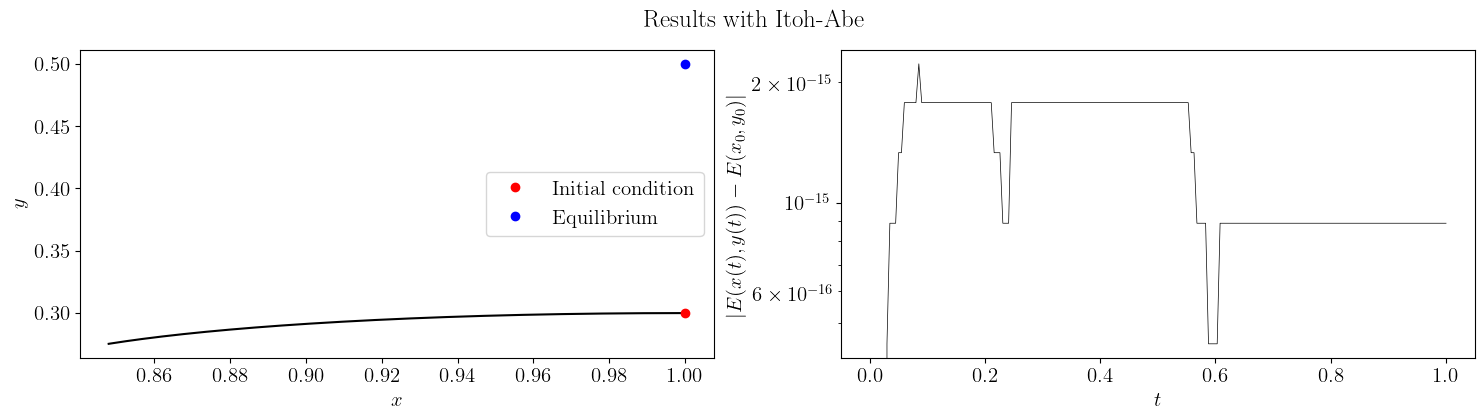

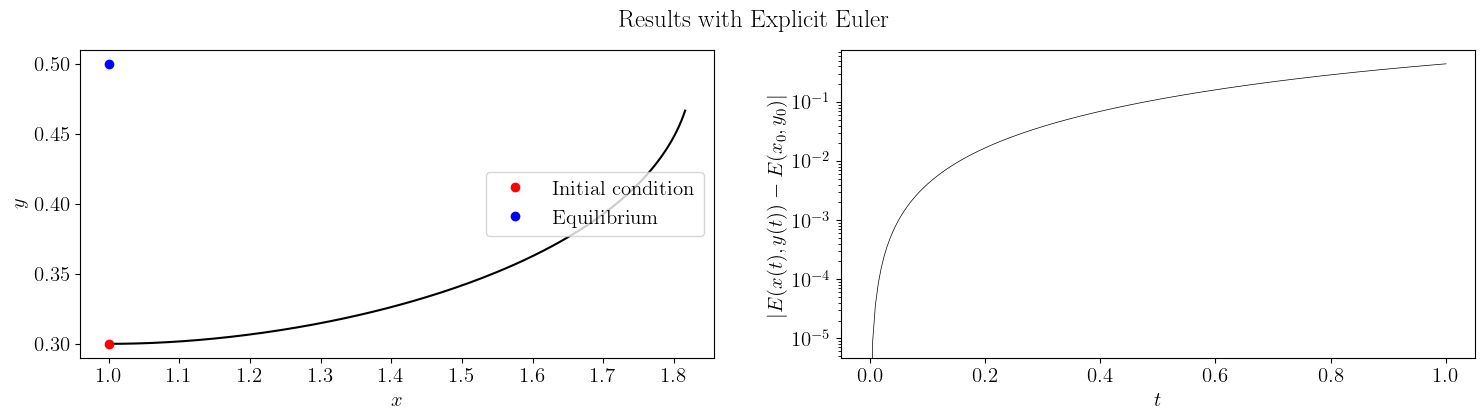

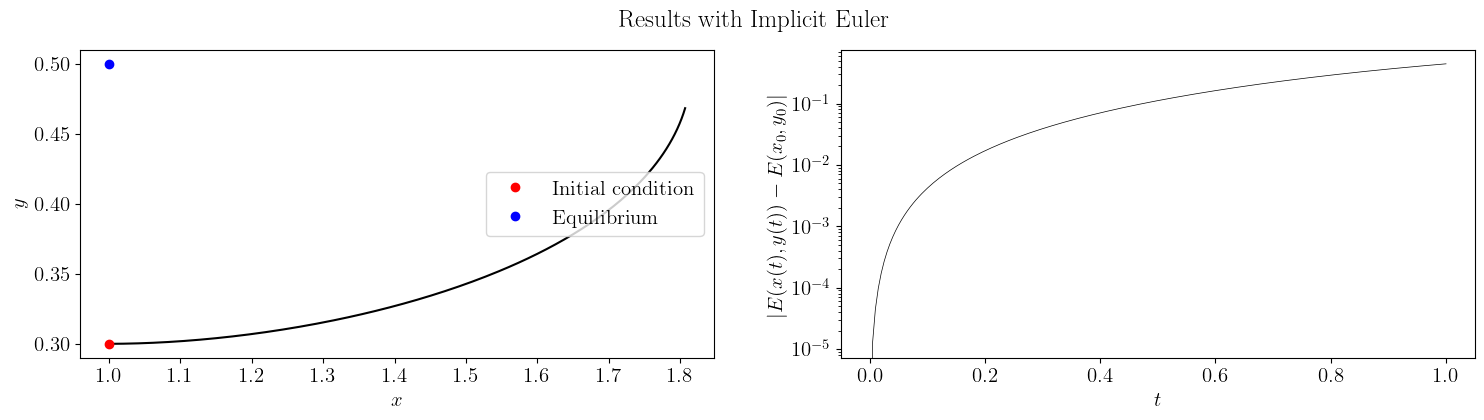

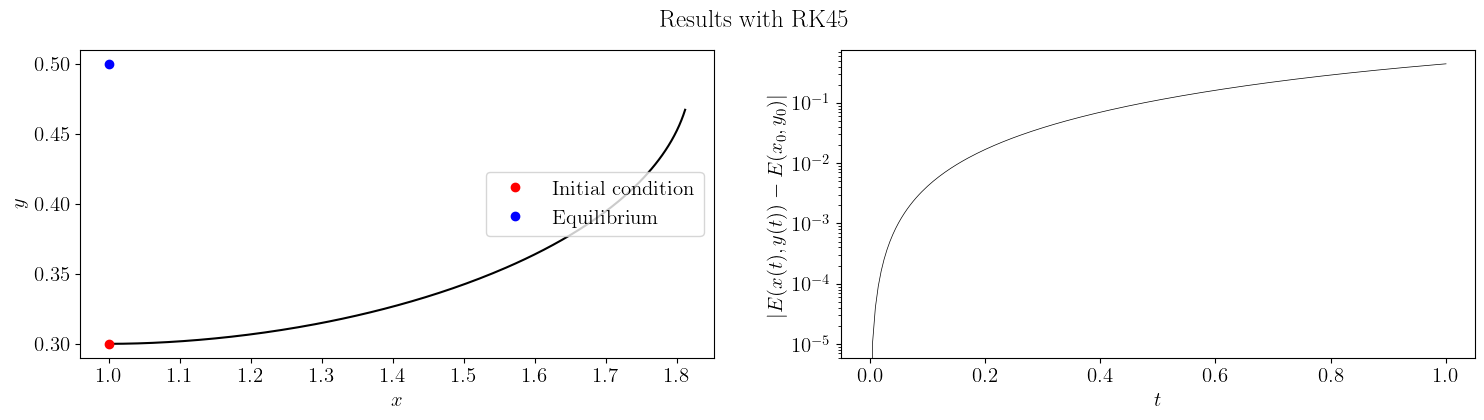

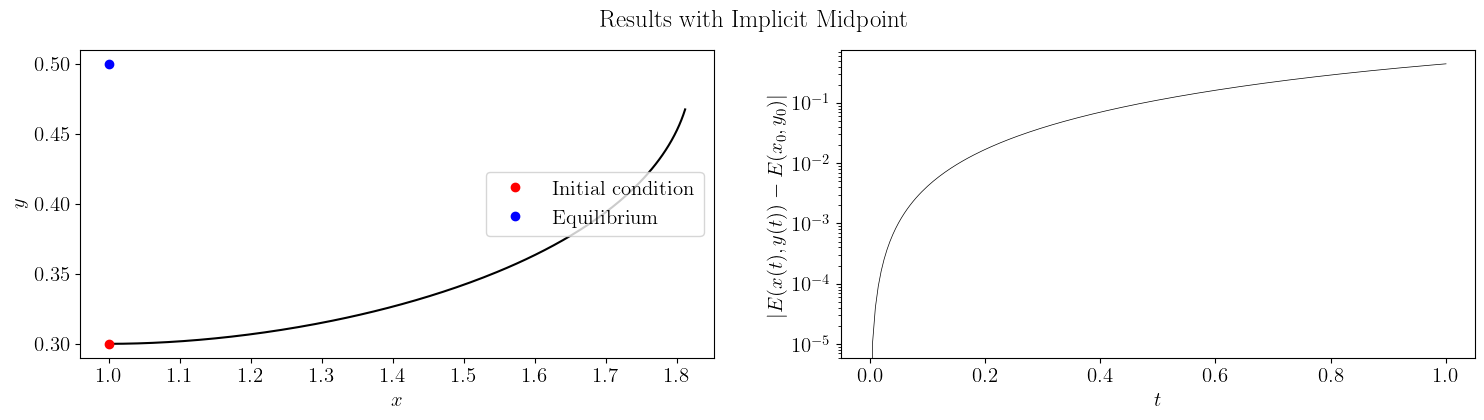

In [6]:
get_plots_LotkaVolterra(solnDG,t_eval,method="Itoh-Abe")
get_plots_LotkaVolterra(solnEE,t_eval,method="Explicit Euler")
get_plots_LotkaVolterra(solnIE,t_eval,method="Implicit Euler")
get_plots_LotkaVolterra(solnRK45,t_eval,method="RK45")
get_plots_LotkaVolterra(solnIMP,t_eval,method="Implicit Midpoint")